# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Andrea Sala - Settembre 2020</span>
# <span style="color:darkgreen">  Esercitazione 10</span>

## Esercizio 10.1
By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previous numerical exercise.

Il codice, di impronta simile a quello sviluppato per l'algoritmo genetico, performa un **Simulated Annealing** per risolvere il problema del commesso viaggiatore. Le classi e i metodi usati sono i medesimi di quelli dell'Esercitazione 9. <br/>
Il codice genera un possibile itinerario in modo casuale partendo da un valore di temperatura fittizia $T=1000$, e da lì inizia a proporre delle mutazioni accettandole come se fossero mosse di un campionamento Metropolis: viene calcolata l'energia (che in questo caso è la lunghezza del percorso) per la configurazione nuova e quella vecchia e viene accettata la mossa con probabilità 
$$ A = \min (1, e^{-\beta \left( L^{(1)}_{new} - L^{(1)}_{old} \right)}) \quad \quad \beta=1/T$$
Ad ogni generazione, ognuna delle tre mutazioni (*Swap*, *Shift* e *Reverse*) viene proposta $N_{steps}=100$ volte e al termine di ogni generazione la temperatura viene abbassata di un fattore 0.995. Data la rapidità di abbassamento della lunghezza del percorso, ho scelto di impostare il numero delle generazioni a $N_{gen}=250$. Osservando i risultati, il simulated annealing produce risultati molto simili a quelli dell'algoritmo genetico, ma leggermente diversi: in particolare il percorso sulla circonferenza viene mappato in modo più efficiente mentre quello all'interno del quadrato è migliore nell'algoritmo genetico. Va ricordato infatti che, anche con un numero molto alto di generazioni, il simulated annealing è un metodo approssimativo, perchè non si potrà mai raggiungere una temperatura nulla. Per questo motivo il risultato ottenuto con il simulated annealing è sempre un'approssimazione "dall'alto" dell'energia di ground state del sistema. Tutti i parametri della simulazione (numero di generazioni, numero di step per generazione, temperatura inizale, disposizione delle città) vengono passati al codice con un file `input.dat`

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import math
import scipy

%config InlineBackend.figure_format = 'retina'

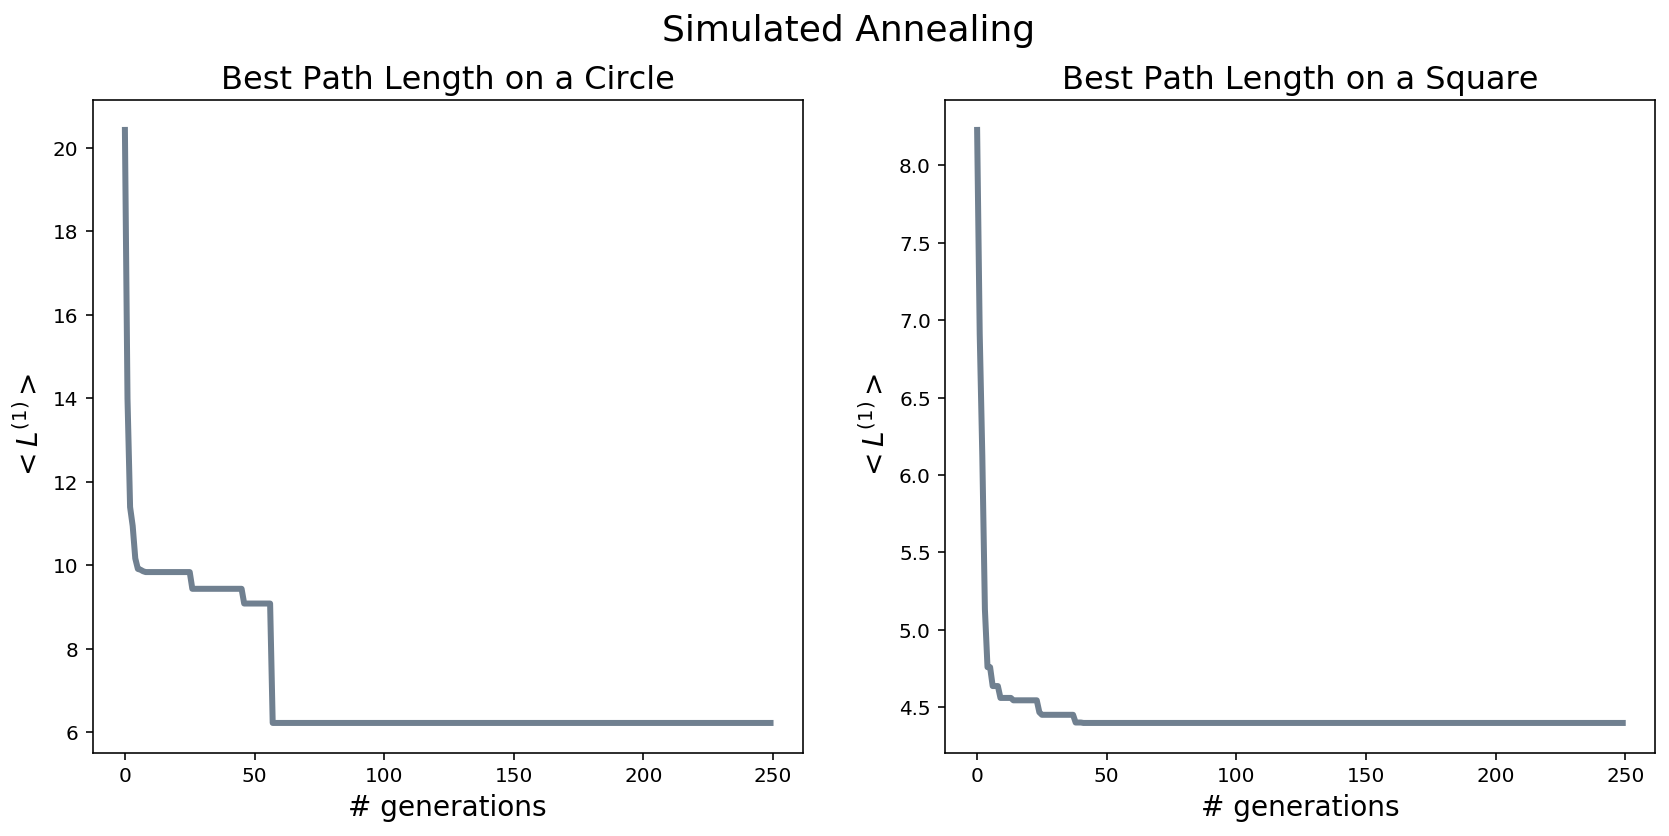

### Simulated Annealing ##          ## Genetic Algorithm ###
#    Circle: 6.2265      #          #   Circle:  6.28645   #
#    Square: 4.39738     #          #   Square:  4.39125   #
##########################          ########################


In [2]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

plt.suptitle("Simulated Annealing", fontsize=18)

GAcbest = np.loadtxt("../Ex09_AS/Results/Circle_BestPath.out", skiprows=16999,unpack=True)
GAsbest = np.loadtxt("../Ex09_AS/Results/Square_BestPath.out", skiprows=16999,unpack=True)

t, best1 = np.loadtxt("10.1/Circle_BestPath.out", usecols=(0,2), unpack=True)
t, best2 = np.loadtxt("10.1/Square_BestPath.out", usecols=(0,2), unpack=True)

axs[0].set_title("Best Path Length on a Circle", fontsize=16)
axs[0].plot(t, best1, color='slategrey', linewidth=3)


axs[1].set_title("Best Path Length on a Square", fontsize=16)
axs[1].plot(t, best2, color='slategrey', linewidth=3)


for gino in axs.flat:
    gino.set_xlabel("# generations", fontsize=14)
    gino.set_ylabel("$<L^{(1)}>$", fontsize=14)


plt.show()

print("### Simulated Annealing ##          ## Genetic Algorithm ###")
print("#    Circle:", best1[-1], "     #          #   Circle: ", GAcbest, "  #")
print("#    Square:", best2[-1], "    #          #   Square: ", GAsbest, "  #")
print("##########################          ########################")



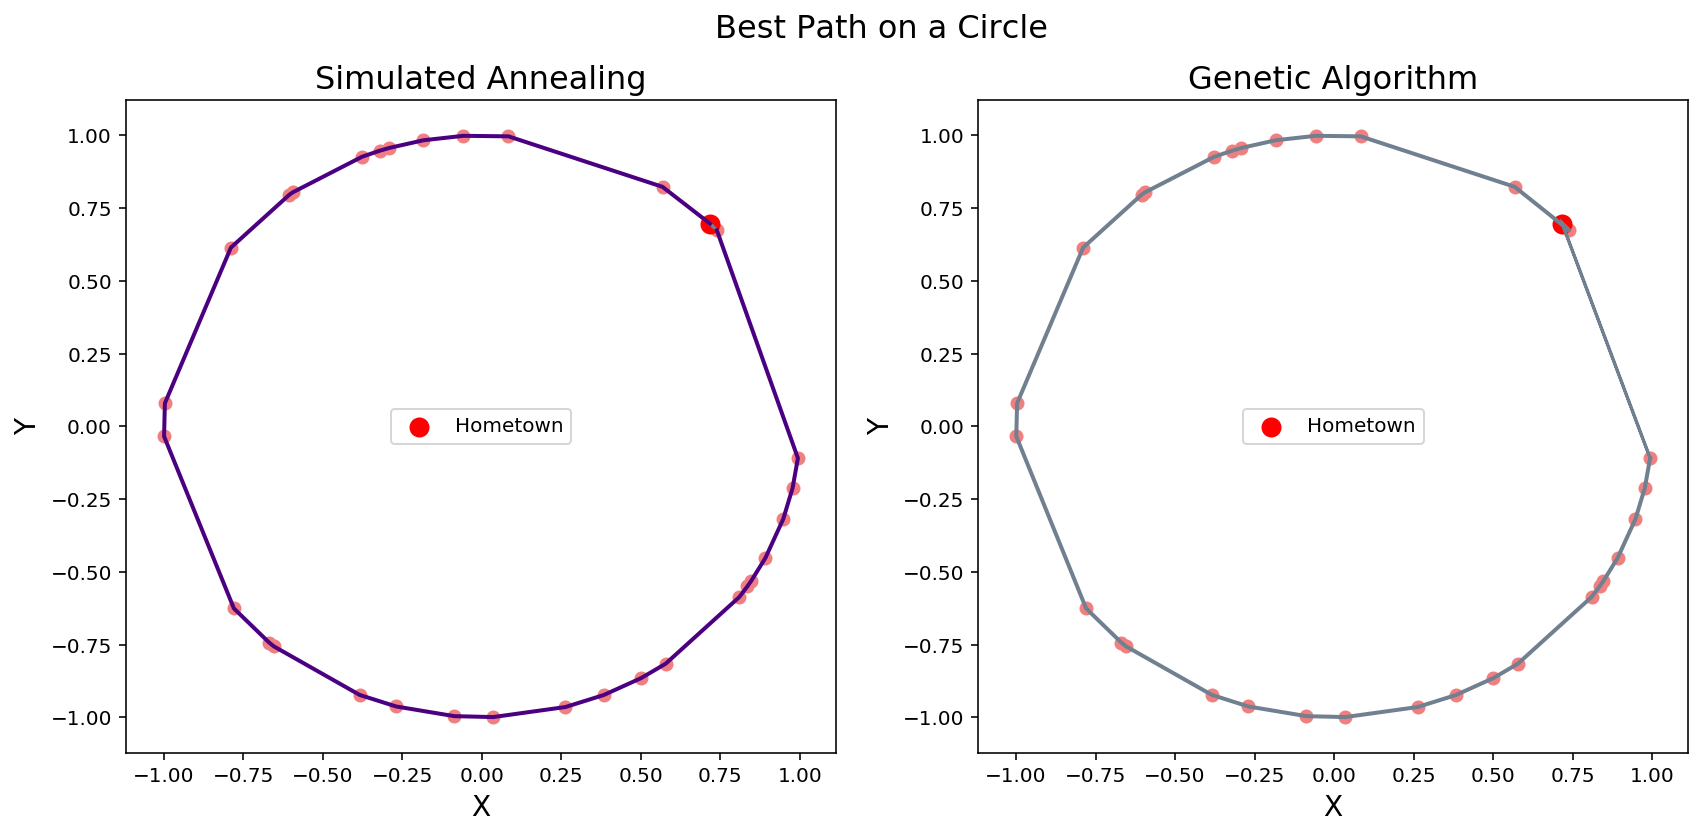

In [3]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

x1,y1 = np.loadtxt("10.1/Circle_Map.out", usecols=(0,1),unpack=True)
x2,y2 = np.loadtxt("../Ex09_AS/Results/Circle_Map.out", usecols=(0,1),unpack=True)

plt.suptitle("Best Path on a Circle", fontsize=16)

axs[0].set_title("Simulated Annealing", fontsize=16)
axs[0].plot(x1,y1, color='indigo', linewidth=2)
axs[0].scatter(x1, y1, color='lightcoral')    
axs[0].scatter(x1[0], y1[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0].arrow(x1[31], y1[31], x1[0]-x1[31], y1[0]-y1[31], color='slategrey', linewidth=1.5)

axs[1].set_title("Genetic Algorithm", fontsize=16)
axs[1].plot(x2,y2, color='slategrey', linewidth=2)
axs[1].scatter(x2, y2, color='lightcoral')    
axs[1].scatter(x2[0], y2[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1].arrow(x2[-1], y2[-1], x2[0]-x2[-1], y2[0]-y2[-1], color='slategrey', linewidth=1.5)


for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium", loc='center')

plt.show()

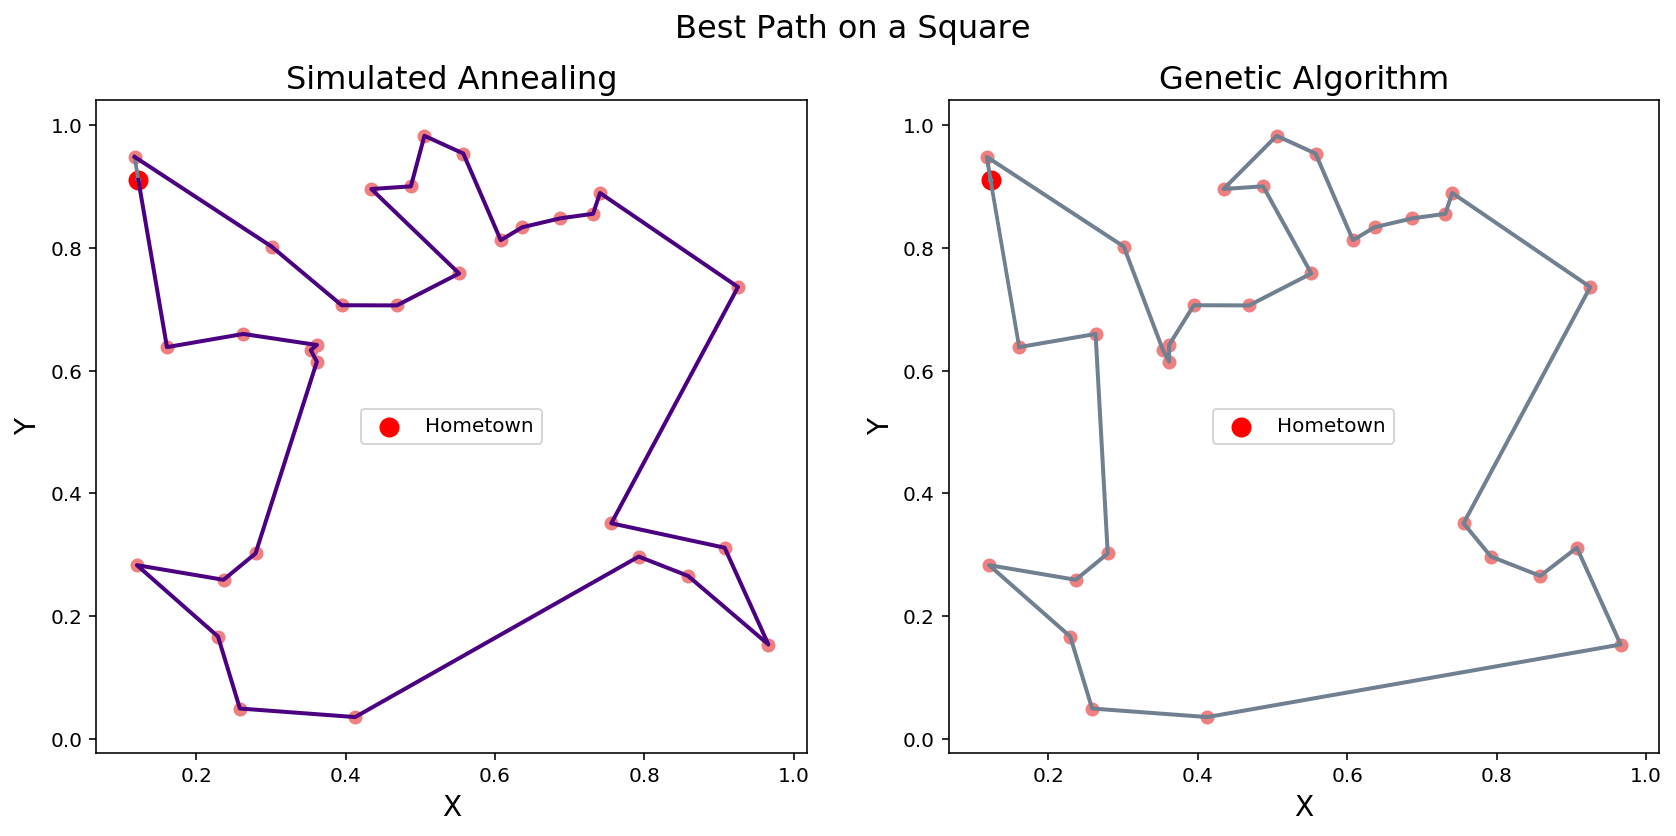

In [4]:
fig, axs= plt.subplots(1,2, figsize=(14,6))

x1,y1 = np.loadtxt("10.1/Square_Map.out", usecols=(0,1),unpack=True)
x2,y2 = np.loadtxt("../Ex09_AS/Results/Square_Map.out", usecols=(0,1),unpack=True)

plt.suptitle("Best Path on a Square", fontsize=16)

axs[0].set_title("Simulated Annealing", fontsize=16)
axs[0].plot(x1,y1, color='indigo', linewidth=2)
axs[0].scatter(x1, y1, color='lightcoral')    
axs[0].scatter(x1[0], y1[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[0].arrow(x1[31], y1[31], x1[0]-x1[31], y1[0]-y1[31], color='slategrey', linewidth=1.5)

axs[1].set_title("Genetic Algorithm", fontsize=16)
axs[1].plot(x2,y2, color='slategrey', linewidth=2)
axs[1].scatter(x2, y2, color='lightcoral')    
axs[1].scatter(x2[0], y2[0], color='red', marker='o', linewidths=4, label="Hometown")
axs[1].arrow(x2[-1], y2[-1], x2[0]-x2[-1], y2[0]-y2[-1], color='slategrey', linewidth=1.5)


for gino in axs.flat:
    gino.set_xlabel("X", fontsize=14)
    gino.set_ylabel("Y", fontsize=14)
    gino.legend(fontsize="medium", loc='center')

plt.show()

## Esercizio 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

Lo scopo di questo esercizio è mostrare che parallelizzando il codice, ovvero mandandolo su 4 nodi differenti, le prestazioni milgiorano. Utilizzando la libreria MPI il codice performa quattro algoritmi genetici in parallelo. Affinché le città fossero generate sempre allo stesso modo (all'interno di un quadrato di lato unitario), ho generato le città nell'esercizio 9.1 e successivamente sono state passate ai 4 con lo stream in input chiamato `LoadCities`. Inoltre, ogni $N_{mig}=100$ generazioni, vengono estratti in modo casuale due rank differenti e viene chiesto loro di scambiarsi il cromosoma migliore all'interno della propria pooplazione: per fare questo sono venute in aiuto le funzioni `MPI_Send()` e `MPI_Recv()`. Poiché queste funzioni lavorano con i vector, la sequenza di città dei cromosomi migliori è stata trascritta su un vector di interi, inviata e successivamente reinserita all'interno di un'istanza della classe Itinerario. Il cromosoma migliore appena ricevuto va a sostituire il cromosoma peggiore della popolazione (esattamente come nel Crossover). Tutte le altre caratteristiche del codice sono rimaste invariate.


Ho scelto di rappresentare il percorso migliore ottenuto alla fine di ogni run per ogni nodo, e un grafico della lunghezza del miglior percorso della popolazione in funzione della generazione, sovrapponendo le curve dei quattro rank e anche quella dell'algoritmo eseguito in serie.<br/> Osservando i grafici si nota che il codice parallelizzato, oltre a convergere molto più velocemente (dopo circa 7500 generazioni), trova un valore di percorso ottimale leggermente minore rispetto a quello dell'algoritmo genetico in serie. 

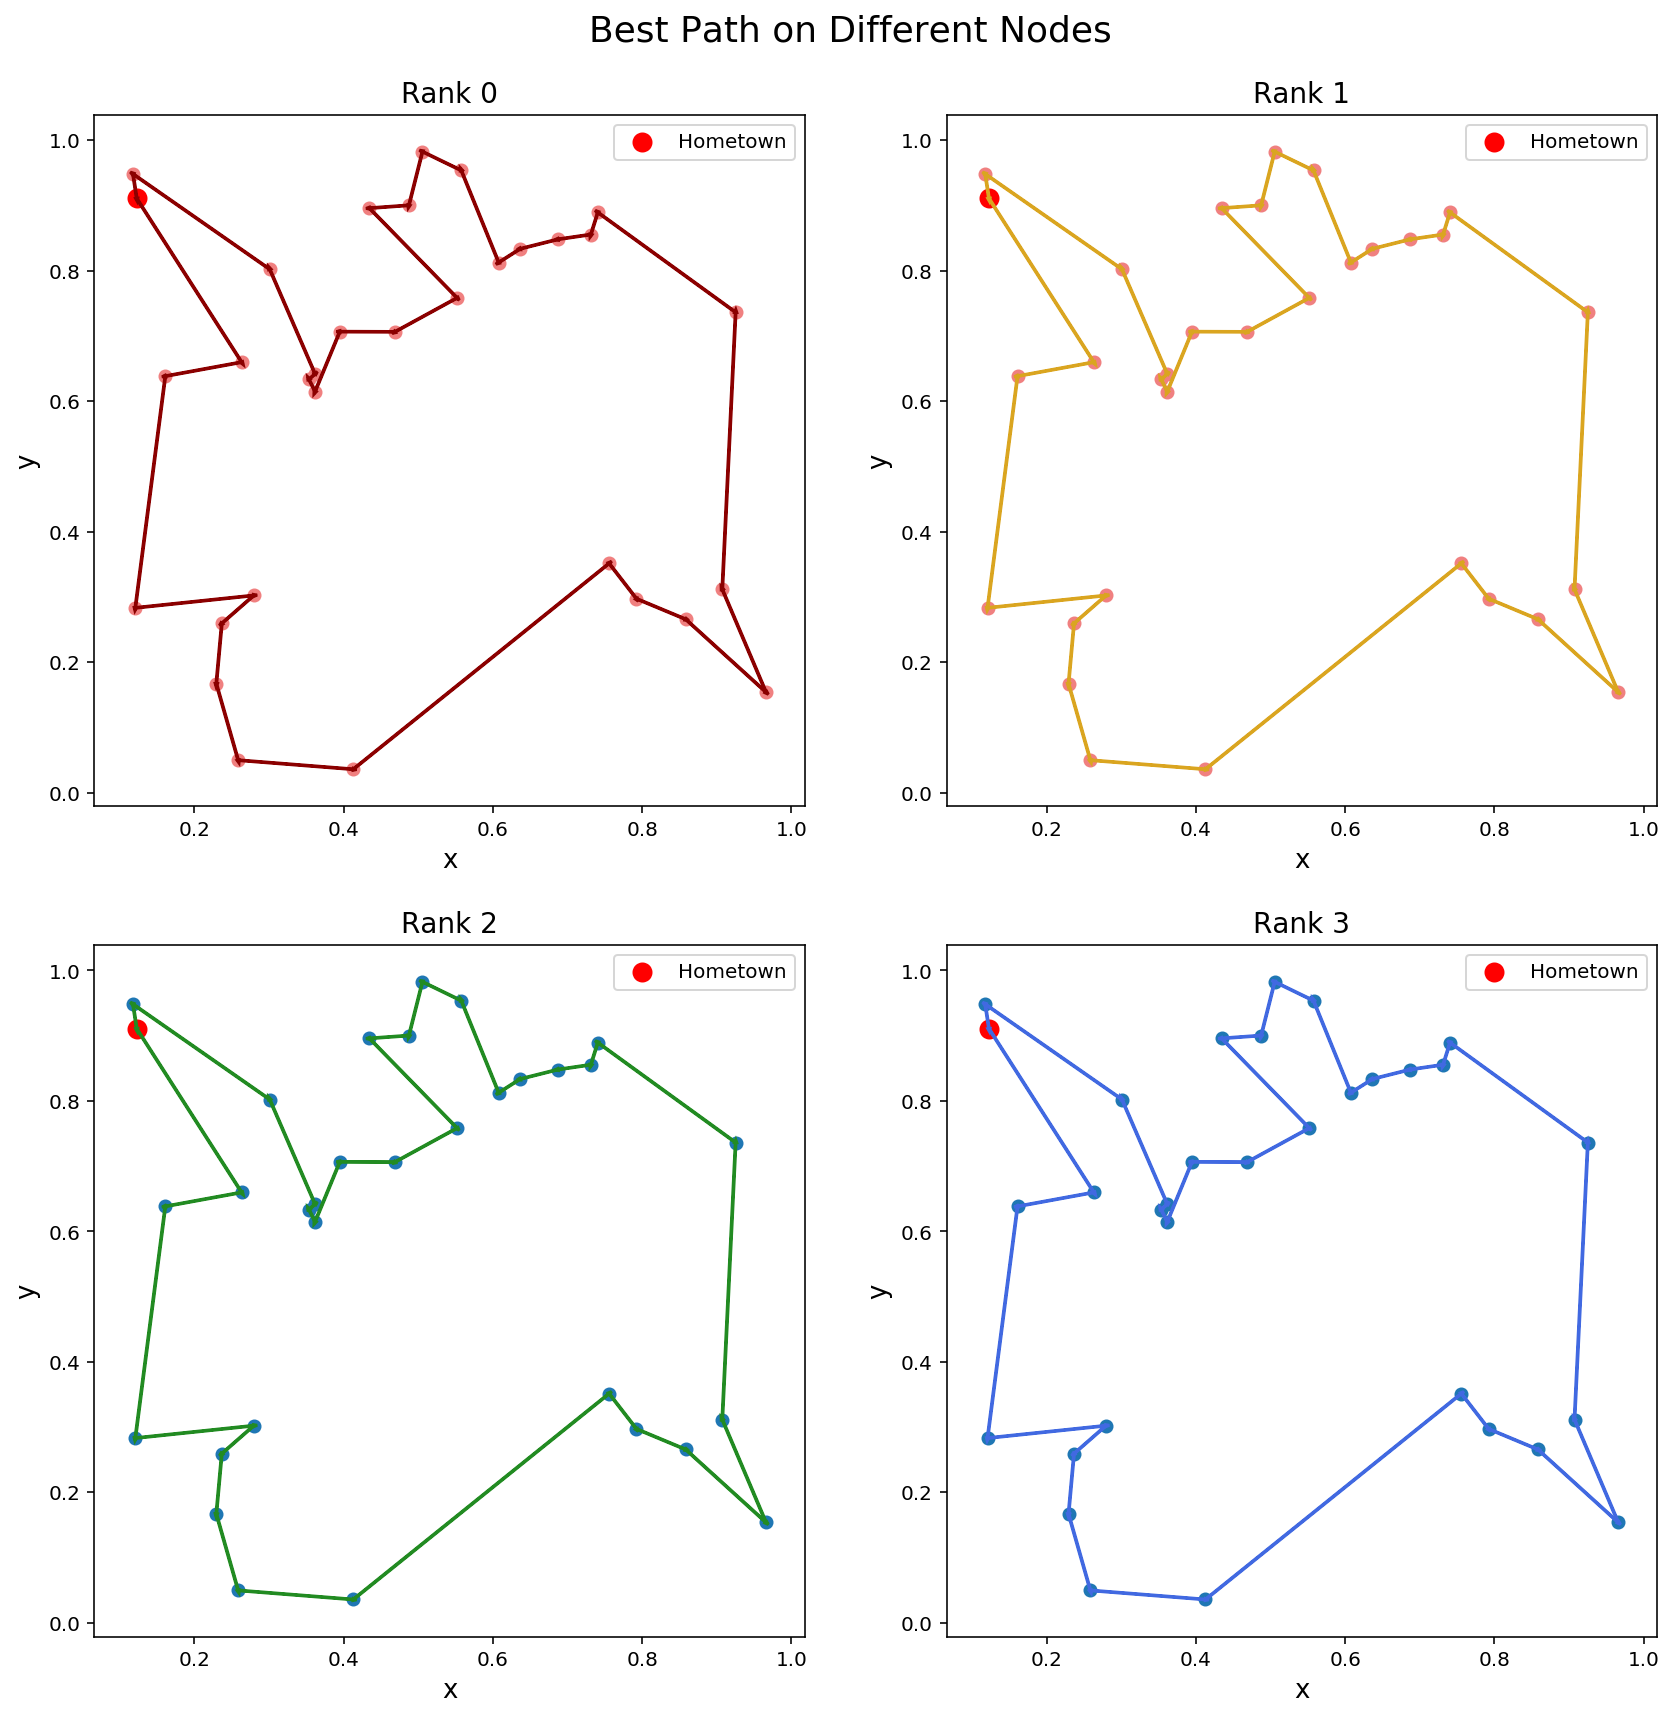

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(14,14))
plt.suptitle("Best Path on Different Nodes",fontsize=18, y=0.93)


x0, y0 = np.loadtxt('10.2/Results/Map_Rank00.out', usecols=(0,1), unpack = True)
axs[0, 0].set_title('Rank 0', fontsize=14)
for i in range(len(x0)-1):
    axs[0, 0].arrow(x0[i], y0[i], x0[i+1]-x0[i], y0[i+1]-y0[i], color='darkred', linewidth=1.5)
axs[0, 0].arrow(x0[-1], y0[-1], x0[0]-x0[-1], y0[0]-y0[-1], color='darkred', linewidth=1.5)
axs[0, 0].scatter(x0, y0, color='lightcoral')    
axs[0, 0].scatter(x0[0], y0[0], color='red', label="Hometown", linewidths=4)

x1, y1 = np.loadtxt('10.2/Results/Map_Rank01.out', usecols=(0,1), unpack = True)
axs[0, 1].set_title('Rank 1', fontsize=14)
for i in range(len(x1)-1):
    axs[0, 1].arrow(x1[i], y1[i], x1[i+1]-x1[i], y1[i+1]-y1[i], color='goldenrod', linewidth=1.5)
axs[0, 1].arrow(x1[-1], y1[-1], x1[0]-x1[-1], y1[0]-y1[-1], color='goldenrod', linewidth=1.5)
axs[0, 1].scatter(x1, y1, c='lightcoral')    
axs[0, 1].scatter(x1[0], y1[0], color='red', label="Hometown", linewidths=4)

x2, y2 = np.loadtxt('10.2/Results/Map_Rank02.out', usecols=(0,1), unpack = True)
axs[1, 0].set_title('Rank 2', fontsize=14)
for i in range(len(x2)-1):
    axs[1, 0].arrow(x2[i], y2[i], x2[i+1]-x2[i], y2[i+1]-y2[i], color='forestgreen', linewidth=1.5)
axs[1, 0].arrow(x2[-1], y2[-1], x2[0]-x2[-1], y2[0]-y2[-1], color='forestgreen', linewidth=1.5)
axs[1, 0].scatter(x2, y2)    
axs[1, 0].scatter(x2[0], y2[0], color='red', label="Hometown", linewidths=4)

x3, y3 = np.loadtxt('10.2/Results/Map_Rank03.out', usecols=(0,1), unpack = True)
axs[1, 1].set_title('Rank 3', fontsize=14)
for i in range(len(x3)-1):
    axs[1, 1].arrow(x3[i], y3[i], x3[i+1]-x3[i], y3[i+1]-y3[i], color='royalblue', linewidth=1.5)
axs[1, 1].arrow(x3[-1], y3[-1], x3[0]-x3[-1], y3[0]-y3[-1], color='royalblue', linewidth=1.5)
axs[1, 1].scatter(x3, y3)    
axs[1, 1].scatter(x3[0], y3[0], color='red', label="Hometown", linewidths=4)
for ax in axs.flat:
    ax.legend()
    ax.set_xlabel('x', fontsize=13)
    ax.set_ylabel('y', fontsize=13)

plt.show()

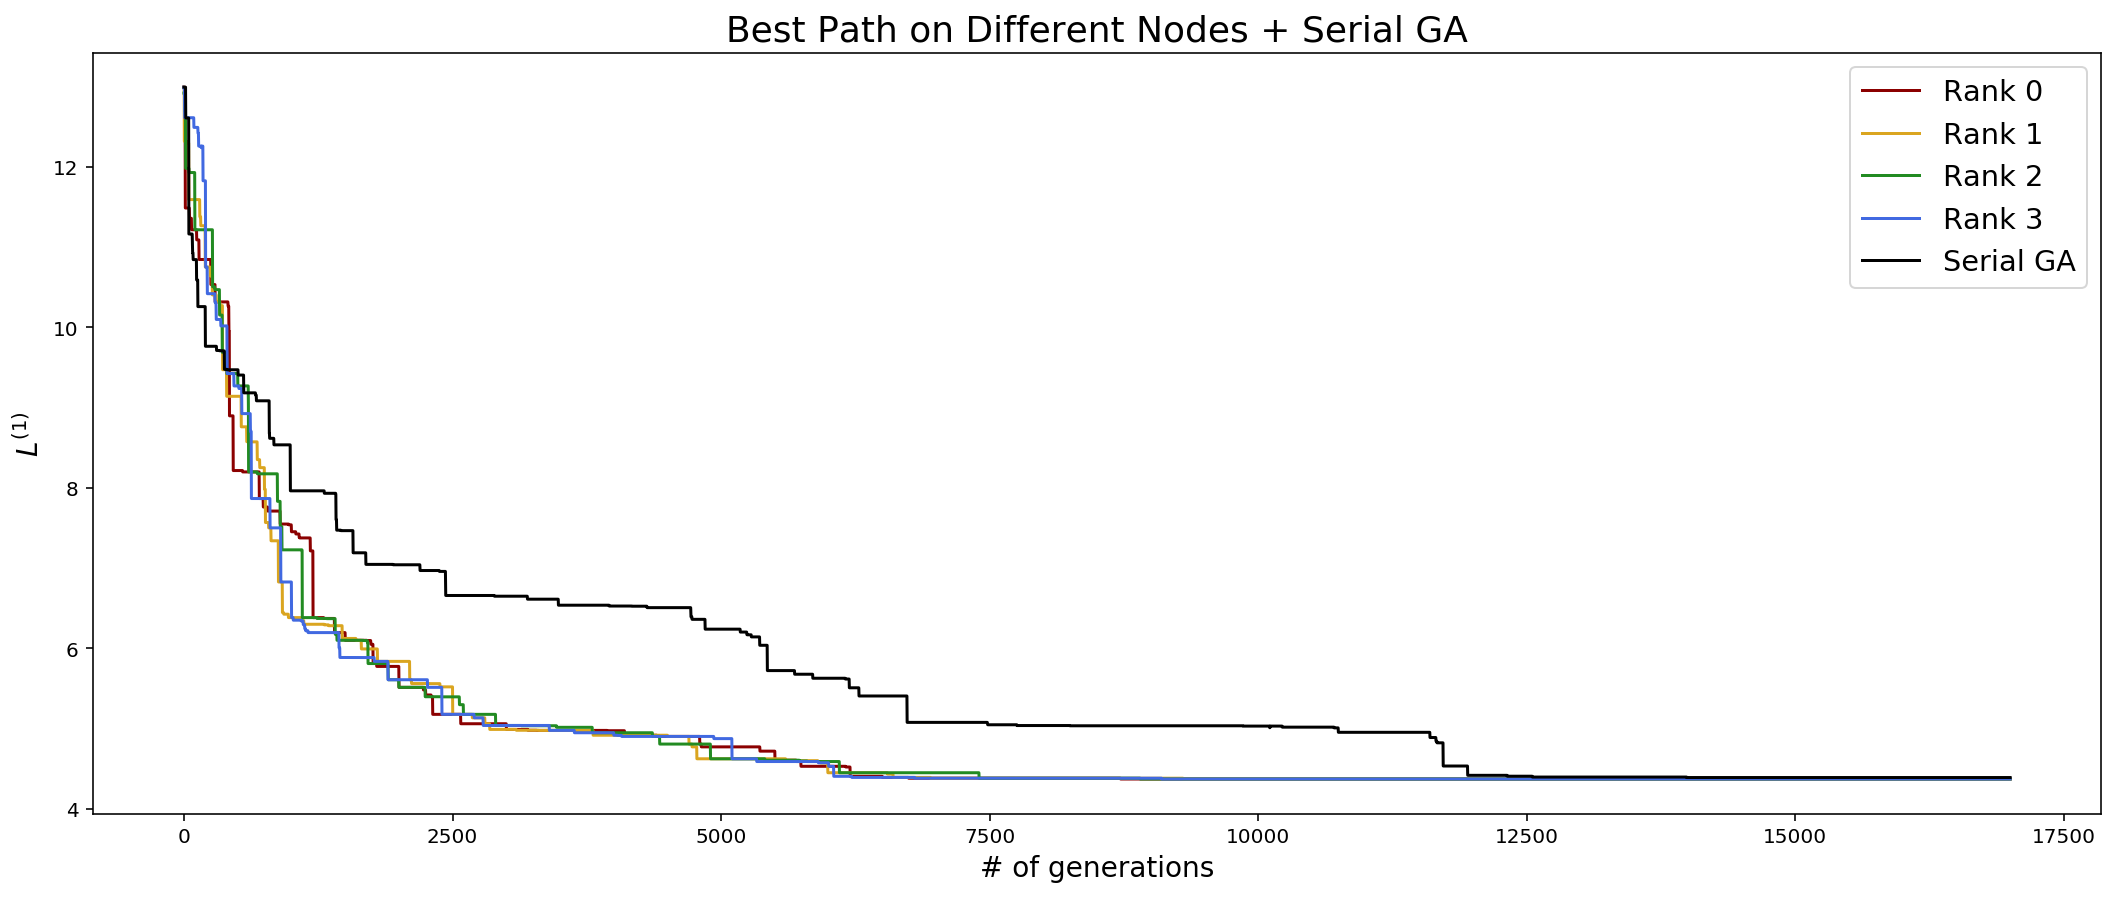

#### Best Path Length ####
#  Serial GA:  4.39125   #
# Parallel GA:  4.37288  #
##########################


In [7]:
L0 = np.loadtxt("10.2/Results/BestPath_Rank00.out", usecols=0, unpack=True)
L1 = np.loadtxt("10.2/Results/BestPath_Rank01.out", usecols=0, unpack=True)
L2 = np.loadtxt("10.2/Results/BestPath_Rank02.out", usecols=0, unpack=True)
L3 = np.loadtxt("10.2/Results/BestPath_Rank03.out", usecols=0, unpack=True)
LS = np.loadtxt("../Ex09_AS/Results/Square_BestPath.out", unpack=True)

ngen=np.arange(len(L0))
nmig=100


plt.figure(figsize=(18,7))
plt.title("Best Path on Different Nodes + Serial GA",fontsize=18)
plt.xlabel("# of generations", fontsize=14)
plt.ylabel("$L^{(1)}$", fontsize=14)
plt.plot(ngen, L0, label='Rank 0', c='darkred')
plt.plot(ngen, L1, label='Rank 1', c='goldenrod')
plt.plot(ngen, L2, label='Rank 2', c='forestgreen')
plt.plot(ngen, L3, label='Rank 3', c='royalblue')
plt.plot(ngen, LS, label='Serial GA', c='k')
plt.legend(fontsize='x-large', loc='best')
plt.show()

print("#### Best Path Length ####")
print("#  Serial GA: ", LS[-1], "  #")
print("# Parallel GA: ",L0[-1]," #")
print("##########################")